# Logistic Regression

In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,fbeta_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [487]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [488]:
print(df.shape)
print(df.columns)

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [489]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [490]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [491]:
df['diagnosis'].value_counts() # B is for Benign and M is for Malignant

,count
diagnosis,
B,357
M,212


In [492]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

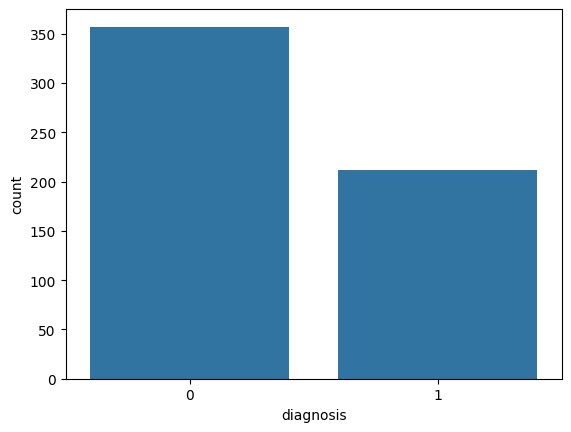

In [493]:
sns.countplot(data=df, x='diagnosis')

In [494]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [495]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1,shuffle=True)
scalar = StandardScaler()
Xtrain_scaled = scalar.fit_transform(Xtrain)
Xtest_scaled = scalar.transform(Xtest)

In [496]:
model = LogisticRegression(max_iter=5000)
model.fit(Xtrain_scaled,ytrain)

LogisticRegression(max_iter=5000)

In [497]:
y_hat = model.predict(Xtest_scaled)

In [498]:
print(classification_report(ytest,y_hat))
f2_score = fbeta_score(ytest, y_hat, beta=2) # Since f2 score gives more weight to Recall as we are performing medical diagnosis.
print(f"F2 Score: {f2_score}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

F2 Score: 0.9651898734177216


## Confusion Matrix

In [499]:
confusionMatrix = confusion_matrix(ytest,y_hat)
print(confusionMatrix)

[[105   3]
 [  2  61]]


## Heat Map

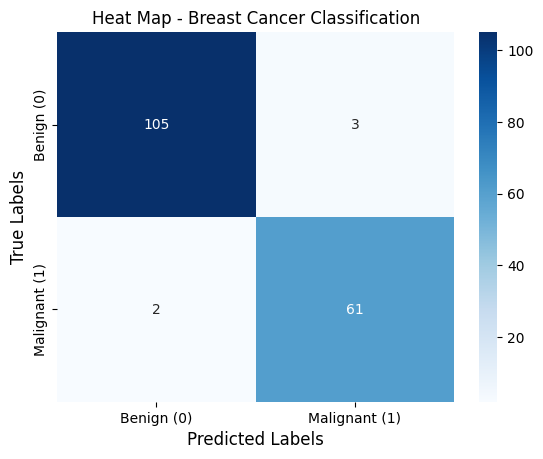

In [500]:
labels = ['Benign (0)', 'Malignant (1)']

sns.heatmap(confusionMatrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Heat Map - Breast Cancer Classification')

plt.show()

## Implementing Logistic Regression

In [501]:
print(Xtrain_scaled.shape)
print(type(Xtrain_scaled))
theta = np.zeros(Xtrain_scaled.shape[1])
print(theta.shape)
print(type(theta))
theta0 = 0

(398, 30)
<class 'numpy.ndarray'>
(30,)
<class 'numpy.ndarray'>


In [502]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [503]:
def hypothesis(X,theta0,theta):
  z = theta0 + np.dot(X,theta.T)
  return sigmoid(z)

In [504]:
def costFunction(X,y,theta0,theta):
  m = len(y)
  h = hypothesis(X,theta0,theta)
  J = (np.dot(-y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))/m
  return J

In [505]:
def computeGradients(X,y,theta0,theta):
    m = len(y)
    y_hat = hypothesis(X, theta0, theta)
    dtheta0 = np.sum(y_hat - y) / m
    dtheta = np.dot(X.T, (y_hat - y)) / m
    return dtheta0, dtheta

In [506]:
def updateParameters(theta0, theta, dtheta0, dtheta, alpha):
    theta0 = theta0 - alpha * dtheta0
    theta = theta - alpha * dtheta
    return theta0, theta

In [507]:
def GradientDescent(X,y,theta0,theta,alpha,iterations):
    cost_history = []

    for i in range(iterations):
        if i % 1000 == 0:
            cost = costFunction(X,y,theta0,theta)
            print(f"Iteration {i}: Cost = {cost:.4f}")
            cost_history.append(cost)

        dtheta0, dtheta = computeGradients(X,y,theta0,theta)
        theta0, theta = updateParameters(theta0,theta,dtheta0,dtheta,alpha)

    return theta0, theta, cost_history

In [508]:
alpha,iterations = 0.005,10000
theta0, theta, cost_history = GradientDescent(Xtrain_scaled,ytrain,theta0,theta,alpha,iterations)
print(f"Final Cost: {cost_history[-1]:.4f}")
print(f"Final Theta0: {theta0:.4f}")
print(f"Final Theta: {theta}")

Iteration 0: Cost = 0.6931
Iteration 1000: Cost = 0.1249
Iteration 2000: Cost = 0.0987
Iteration 3000: Cost = 0.0875
Iteration 4000: Cost = 0.0808
Iteration 5000: Cost = 0.0763
Iteration 6000: Cost = 0.0730
Iteration 7000: Cost = 0.0705
Iteration 8000: Cost = 0.0684
Iteration 9000: Cost = 0.0667
Final Cost: 0.0667
Final Theta0: -0.4290
Final Theta: [ 0.58833883  0.49787088  0.57368902  0.57743879  0.12202679  0.08313355
  0.46743861  0.60949973  0.14956406 -0.44132793  0.58036566 -0.00620987
  0.459789    0.49076626  0.09780446 -0.32680512 -0.10599656  0.18398776
 -0.25397124 -0.38418541  0.76553758  0.68431259  0.72071016  0.70970106
  0.51354639  0.23005708  0.50119577  0.71972533  0.47515191  0.13044177]


In [509]:
probabilities = hypothesis(Xtest_scaled, theta0, theta)
predictions = [1 if p > 0.4 else 0 for p in probabilities] # changed threshold from 0.5 to 0.4 in order to increase recall with a little compromise on precision for Malignant detection.
print(classification_report(ytest,predictions))
f2_score = fbeta_score(ytest, predictions, beta=2)
print(f"F2 Score: {f2_score}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

F2 Score: 0.9651898734177216
